# Prédiction de l'âge d'un opossum à l'aide de la régression

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Chargement du dataset

In [2]:
opossum = pd.read_csv('opossum.csv')
opossum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Nettoyage du dataset

In [3]:
opossum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


On observe ici que l'on a deux valeurs nulles dans la colonne des âges et une valeur nulle dans la colonne de la taille des pattes.

In [4]:
opossum = opossum.dropna()

Supression des lignes où il y a des valeurs nulles, cela permettra de ne pas fausser les résultats.

In [5]:
opossum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


Les lignes en questions ont bien disparues, on voit bien qu'il n'y a plus de valeur nulles dans le dataset. On passe de 104 lignes à 101.

In [6]:
opossum[opossum.duplicated()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


Vérification qu'il n'y a pas de lignes identiques.

In [7]:
opossum.drop(["case"], axis=1, inplace=True)

Suppression de la colonne 'case' car ses valeurs n'auront aucun impact sur les résultats.

In [8]:
opossum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    int64  
 1   Pop       101 non-null    object 
 2   sex       101 non-null    object 
 3   age       101 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


La colonne 'case' a bien été supprimée.

##### Le dataset a bien été nettoyé, pas de lignes identiques ni de valeurs nulles, la colonne inutile a bien été supprimée.

### Analyse exploratoire de données

In [9]:
print(opossum['sex'].value_counts())
print(opossum['Pop'].value_counts())

m    59
f    42
Name: sex, dtype: int64
other    58
Vic      43
Name: Pop, dtype: int64


Permet d'observer la répartition des males/femelles et des différentes espèces. On voit que dans la dataset il y a environ 58% de males et environ 42% de l'espèce 'Victoria'.

#### 1) Visualisation graphique

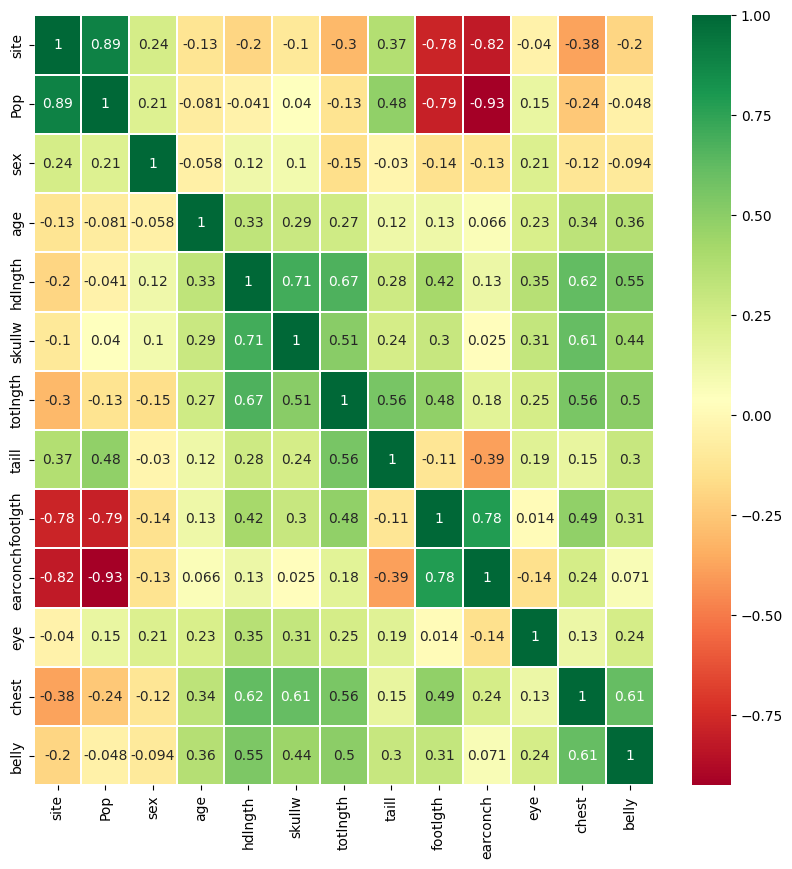

In [10]:
transform = LabelEncoder()
opossum["Pop"] = LabelEncoder().fit_transform(opossum.Pop)
opossum["sex"] = LabelEncoder().fit_transform(opossum.sex)

plt.figure(figsize=[10,10])
sns.heatmap(opossum.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
plt.show()

<em><h5>

<ul>

<li>On voit via la heatmap que certaines variables sont fortement corrélées entre elles.</li>

<li>'skullw' et 'hdlngth', ce qui indique que la largeur du crâne est lié à la longueur de la tête.</li>

<li>'totlngth' et 'hdlngth, ce qui indique que la longueur totale de l'opossum est liée à la longueur de la tête.</li>

<li>'earconch' et 'footlgth', ce qui indique que la taille de ses oreilles est lié à la taille des pattes.</li>

</ul></h5></em>

## Cependant, ce qui nous intéresse ici c'est de pouvoir déterminer l'âge de l'opossum grâce à ses caractéristiques. Il faut donc voir quelles sont les variables les plus corrélées avec la target 'Âge'. On voit sur la heatmap qu'il y en a quelques unes mais pas avec une grosse relation. Je supprime donc les variables inutiles et conserve les plus corrélées avec l'âge même si la corrélation tourne autour de 0,3. Ce qui veut dire que ça ne sera pas très précis.

In [13]:
opossum.drop(["taill", "footlgth", "earconch", "site", "Pop", "sex"], axis=1, inplace=True)
opossum.head()

,age,hdlngth,skullw,totlngth,eye,chest,belly
0,8.0,94.1,60.4,89.0,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,15.1,28.5,33.0


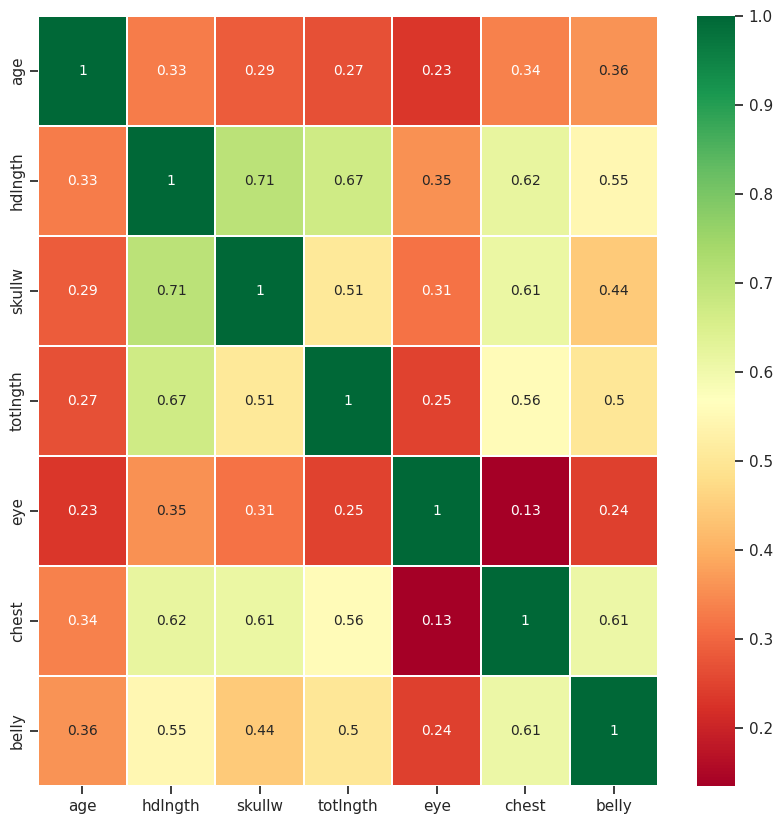

In [29]:
plt.figure(figsize=[10,10])
sns.heatmap(opossum.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
plt.show()

#### 2) Visualisation numérique

In [14]:
opossum.describe()

,age,hdlngth,skullw,totlngth,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.821782,92.730693,56.960396,87.269307,15.050495,27.064356,32.638614
std,1.915182,3.518714,3.102679,4.196802,1.058643,2.020722,2.727745
min,1.000000,82.500000,50.000000,75.000000,12.800000,22.000000,25.000000
25%,2.000000,90.700000,55.000000,84.500000,14.400000,25.500000,31.000000
50%,3.000000,92.900000,56.400000,88.000000,14.900000,27.000000,32.500000
75%,5.000000,94.800000,58.100000,90.000000,15.700000,28.000000,34.000000
max,9.000000,103.100000,68.600000,96.500000,17.800000,32.000000,40.000000


In [15]:
X, Y = opossum.loc[:,["hdlngth", "skullw", "totlngth", "eye", "chest", "belly"]], opossum.loc[:,"age"]

print(X.head())
print(Y.head())

   hdlngth  skullw  totlngth   eye  chest  belly
0     94.1    60.4      89.0  15.2   28.0   36.0
1     92.5    57.6      91.5  16.0   28.5   33.0
2     94.0    60.0      95.5  15.5   30.0   34.0
3     93.2    57.1      92.0  15.2   28.0   34.0
4     91.5    56.3      85.5  15.1   28.5   33.0
0    8.0
1    6.0
2    6.0
3    6.0
4    2.0
Name: age, dtype: float64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# permet ici de splitter le jeu de données pour l'entraînement et pour le test

In [17]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## LINEAR REGRESSION

In [18]:
linreg_model = LinearRegression() # creation du modele
linreg_model.fit(X_train_scale, y_train) # entrainement du modèle

LinearRegression()

In [19]:
# faire des prévisions en utilisant le modèle
linreg_y_pred = linreg_model.predict(X_test_scale)
print(linreg_y_pred)

[3.64845543 5.10543004 3.22851546 3.97238537 4.87294819 2.90885086
 4.25690193 5.25862253 4.30883281 4.4397688  3.92079349 3.33507839
 3.08730888 2.86745684 4.66611723 3.94410999 3.16667881 3.37198818
 4.11156683 4.02583689 2.82629532]


In [20]:
linreg_rmse = np.sqrt(mean_squared_error(y_test, linreg_y_pred))
linreg_r2 = r2_score(y_test,linreg_y_pred)
print("RMSE sur jeu de test",linreg_rmse)
print("R² sur jeu de test",linreg_r2)

RMSE sur jeu de test 1.9972752274429986
R² sur jeu de test 0.11775487694912268


## POLYNOMIAL REGRESSOR

In [21]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

In [22]:
# split et mise à l'échelle du jeu de données
polyreg_X_train, polyreg_X_test, polyreg_y_train, polyreg_y_test = train_test_split(poly_features, Y, test_size=0.2, random_state=42)
scaler_poly = StandardScaler()
polyreg_X_train_scale = scaler_poly.fit_transform(polyreg_X_train)
polyreg_X_test_scale = scaler_poly.transform(polyreg_X_test)

In [23]:
# création du modèle polynomial
polyreg_model = LinearRegression()
polyreg_model.fit(polyreg_X_train_scale, polyreg_y_train)

LinearRegression()

In [24]:
# faire des prévisions en utilisant le modèle
polyreg_y_pred = polyreg_model.predict(polyreg_X_test_scale)
print(polyreg_y_pred)

[3.467629   2.66310434 3.96607228 4.61375979 5.08951125 3.68014712
 4.30292139 5.4712168  1.69666182 6.14395845 4.79763282 6.08244314
 3.28248786 3.63935375 5.39483343 3.6436323  3.61889633 2.93421451
 4.17748912 5.0097765  1.71583216]


In [25]:
# Obtention du score
polyreg_rmse = np.sqrt(mean_squared_error(polyreg_y_test, polyreg_y_pred))
polyreg_r2 = r2_score(polyreg_y_test, polyreg_y_pred)
print("RMSE sur jeu de test",polyreg_rmse)
print("R² sur jeu de test",polyreg_r2)

RMSE sur jeu de test 2.2046597372263914
R² sur jeu de test -0.07497057653645367


# KNN REGRESSOR

In [26]:
param_grid = {'n_neighbors' : np.arange(1,50), 'metric' : ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=4)
grid.fit(X_train_scale, y_train)
KNN_regressor = grid.best_estimator_
KNN_regressor

KNeighborsRegressor(metric='manhattan', n_neighbors=9)

In [27]:
KNN_y_pred = KNN_regressor.predict(X_test_scale)
KNN_rmse = np.sqrt(mean_squared_error(y_test, KNN_y_pred))
KNN_r2 = r2_score(y_test,KNN_y_pred)
print("RMSE sur jeu de test",KNN_rmse)
print("R² sur jeu de test",KNN_r2)

RMSE sur jeu de test 1.7893144191379502
R² sur jeu de test 0.2919127753631263


## Le meilleur résultat du R² étant le KNN regressor, je choisis ce modèle pour la prédiction.

Pour finir, on sauvegarde le scaler et le modèle dans un fichier grâce à Joblib pour pouvoir créer le programme 'opossume.py' nous permettant par la suite de déduire l'âge de l'opossum suivant ses caractéristiqueS.

In [28]:
import joblib
model_complet={ "scaler": scaler,

                "model": KNN_regressor,}

joblib.dump(model_complet, 'model_opossum.joblib')

['model_opossum.joblib']